# WeatherPy

### Analysis
* Latitude lines -20, and 40 have the largest range of different temperatures. It would be interesting to see the different types of micro-climates in those regions. 

* It is approaching the end of summer in the nothern hemisphere; you can see that it is generally warmer there. However you can see the temperatures from the southern hemispher slowly rising.. 

* There is no observable relationship with City Latitude and Wind speed. 




In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import openweathermapy as ow
import time 


from citipy import citipy
from urllib.error import HTTPError
from pprint import pprint

# make sure to update this with your own key...
from apikeys import api_key

In [2]:
coordinates = []
cities = []

# # randomly general coordinates
lat = np.random.uniform(low=-90.000, high=90.000, size=2000)
lng = np.random.uniform(low=-180.000, high=180.000, size=2000)
coordinates = zip(lat, lng)

# for loop for indentifying cities based on coordinates

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
           cities.append(city)
            
# I used 2000 as size because it was consistently giving me the required minimum number of unique cities           
len(cities)       

747

In [3]:
cities

['tuktoyaktuk',
 'chabahar',
 'vaini',
 'port hardy',
 'iqaluit',
 'sorland',
 'rikitea',
 'xichang',
 'longyearbyen',
 'kabo',
 'gemena',
 'bredasdorp',
 'harbour breton',
 'arawa',
 'belaya gora',
 'albany',
 'nikolskoye',
 'mataura',
 'ushtobe',
 'gbarnga',
 'krasnoyarskiy',
 'vila franca do campo',
 'canutama',
 'omboue',
 'busselton',
 'tasiilaq',
 'taolanaro',
 'tuatapere',
 'tsentralnyy',
 'tabiauea',
 'hirara',
 'kilimatinde',
 'samusu',
 'candido mendes',
 'yellowknife',
 'vila velha',
 'mount isa',
 'port alfred',
 'nizhneyansk',
 'upernavik',
 'nanortalik',
 'heyang',
 'shimoda',
 'soyo',
 'seaham',
 'cape town',
 'illoqqortoormiut',
 'kedrovoye',
 'punta arenas',
 'punto fijo',
 'new norfolk',
 'avanigadda',
 'saskylakh',
 'kapaa',
 'marawi',
 'gizo',
 'saldanha',
 'bonavista',
 'hambantota',
 'ahuimanu',
 'upata',
 'carnarvon',
 'hobart',
 'da lat',
 'belushya guba',
 'mucurapo',
 'kalangala',
 'arraial do cabo',
 'thompson',
 'acuna',
 'hermanus',
 'yabrud',
 'port blair'

## api call

In [5]:
 # Build URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
query_params = {
    'appid': api_key,
    'units': 'imperial'
}

info_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']


#empty lists
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat =[]
lng =[]
cities_list = []

In [6]:
print('Beginning Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    response = requests.get(url, params=query_params).json()
    city_url = url + '&q=' + city.replace(' ','+')
    print(f'Processing City # {counter} | {city}')
    print(city_url)
    try:
        city_data = ow.get_current(city,**query_params)
        cl,ct,dt,hm,mt,ws,lt,ln = city_data(*info_keys)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        lng.append(ln)
        cities_list.append(city)
    except HTTPError:
        print('City not found. skipping...')
    counter += 1
print('---------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
---------------------
Processing City # 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=tuktoyaktuk
Processing City # 2 | chabahar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=chabahar
Processing City # 3 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=vaini
Processing City # 4 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=port+hardy
Processing City # 5 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=iqaluit
Processing City # 6 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=sorland
Processing City # 7 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing City # 56 | gizo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=gizo
Processing City # 57 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=saldanha
Processing City # 58 | bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=bonavista
Processing City # 59 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=hambantota
Processing City # 60 | ahuimanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=ahuimanu
Processing City # 61 | upata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=upata
Processing City # 62 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=carnarvo

Processing City # 112 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=tiksi
Processing City # 113 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=palabuhanratu
City not found. skipping...
Processing City # 114 | arman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=arman
Processing City # 115 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=taoudenni
Processing City # 116 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=saleaula
City not found. skipping...
Processing City # 117 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=los+llanos+de+aridane
Processing City # 118 | port hedland
http://api.

Processing City # 167 | nizwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=nizwa
Processing City # 168 | rock springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=rock+springs
Processing City # 169 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=san+patricio
Processing City # 170 | wicklow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=wicklow
Processing City # 171 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=vaitupu
City not found. skipping...
Processing City # 172 | bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=bilibino
Processing City # 173 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing City # 223 | roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=roald
Processing City # 224 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=luderitz
Processing City # 225 | krasnokamensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=krasnokamensk
Processing City # 226 | kimi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=kimi
City not found. skipping...
Processing City # 227 | kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=kutum
Processing City # 228 | umaria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=umaria
Processing City # 229 | west bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b0

Processing City # 279 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=san+quintin
Processing City # 280 | gerash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=gerash
Processing City # 281 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=umzimvubu
City not found. skipping...
Processing City # 282 | inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=inhambane
Processing City # 283 | manyana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=manyana
Processing City # 284 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=khatanga
Processing City # 285 | skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing City # 334 | tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=tezu
Processing City # 335 | alotau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=alotau
City not found. skipping...
Processing City # 336 | hihifo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=hihifo
City not found. skipping...
Processing City # 337 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=ponta+do+sol
Processing City # 338 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=nouadhibou
Processing City # 339 | nassau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=nassau
Processing City # 340 | hualmay
http://api.openweathermap.org/data/2.5/weather?uni

Processing City # 390 | dali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=dali
Processing City # 391 | limbang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=limbang
Processing City # 392 | xuchang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=xuchang
Processing City # 393 | spokane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=spokane
Processing City # 394 | fresnillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=fresnillo
Processing City # 395 | villafranca de los barros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=villafranca+de+los+barros
Processing City # 396 | parakai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543

Processing City # 446 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=sao+filipe
Processing City # 447 | general roca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=general+roca
Processing City # 448 | tigil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=tigil
Processing City # 449 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=la+ronge
Processing City # 450 | mana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=mana
Processing City # 451 | were ilu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=were+ilu
Processing City # 452 | pundaguitan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c

Processing City # 501 | ruatoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=ruatoria
City not found. skipping...
Processing City # 502 | pontes e lacerda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=pontes+e+lacerda
Processing City # 503 | oga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=oga
Processing City # 504 | floro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=floro
Processing City # 505 | ust-omchug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=ust-omchug
Processing City # 506 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=lasa
Processing City # 507 | belle glade
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3d

Processing City # 557 | kalofer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=kalofer
Processing City # 558 | sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=sabang
Processing City # 559 | haibowan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=haibowan
City not found. skipping...
Processing City # 560 | dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=dwarka
Processing City # 561 | rockport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=rockport
Processing City # 562 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=kloulklubed
Processing City # 563 | husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df475

Processing City # 612 | adre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=adre
Processing City # 613 | inuvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=inuvik
Processing City # 614 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=port+lincoln
Processing City # 615 | lukovetskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=lukovetskiy
Processing City # 616 | jolalpan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=jolalpan
Processing City # 617 | tuy hoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=tuy+hoa
Processing City # 618 | kpandu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c2

Processing City # 668 | vieux-habitants
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=vieux-habitants
Processing City # 669 | palmerston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=palmerston
Processing City # 670 | garowe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=garowe
Processing City # 671 | ambunti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=ambunti
Processing City # 672 | garbolovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=garbolovo
Processing City # 673 | morristown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=morristown
Processing City # 674 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1

Processing City # 723 | black river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=black+river
Processing City # 724 | flores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=flores
Processing City # 725 | ulagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=ulagan
Processing City # 726 | kindu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=kindu
Processing City # 727 | barcelos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=barcelos
Processing City # 728 | phan thiet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q=phan+thiet
Processing City # 729 | tondano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3df47543f1f64b050a951e7bf50c6c27&q

In [31]:
# create df
weather_df = pd.DataFrame({
     'City':cities_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temp':max_temp,
     'Wind Speed':wind_speed,
     })
weather_df.head()



# save to csv

output_data_file = "output_data/cities.csv"
weather_df.to_csv(output_data_file)



In [8]:
weather_df.count()

City          671
Cloudiness    671
Country       671
Date          671
Humidity      671
Lat           671
Lng           671
Max Temp      671
Wind Speed    671
dtype: int64

## Latitude vs Temperature plot

In [25]:
plt.style.use('seaborn-white')

plt.figure(dpi=1200)

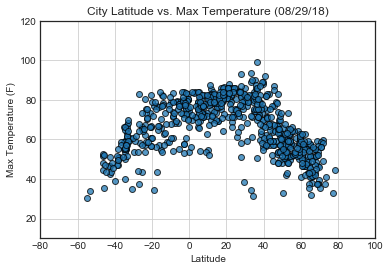

In [38]:
 # Build scatter plot
plt.scatter(weather_df['Lat'], 
            weather_df['Max Temp'],
            label="Cities",
            alpha=0.75,edgecolor="black", marker="o" 
            )

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


plt.xlim(-80,100)
plt.ylim(10,120)

plt.savefig("output_data/lat_vs_temp.png", dpi=1000)

plt.show()

## City Latitude vs Humidity



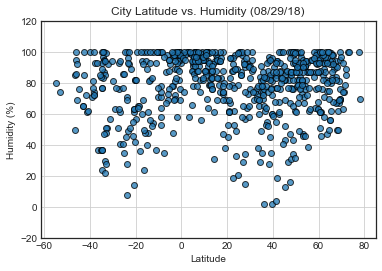

In [32]:
# Build the scatter plot
plt.scatter(weather_df['Lat'], 
            weather_df['Humidity'],
            label="Cities",
            alpha=0.75,edgecolor="black", marker="o" )

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(-20,120)

plt.savefig("output_data/lat_vs_humidity.png", dpi=1000)

plt.show()

## Latitude Vs Cloudiness

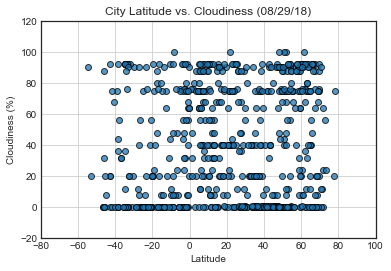

In [36]:
# Build the scatter plot
plt.scatter(weather_df['Lat'], 
            weather_df['Cloudiness'],
            label="Cities",
            alpha=0.75,edgecolor="black", marker="o")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.xlim(-80,100)
plt.ylim(-20,120)


plt.savefig("output_data/lat_vs_cloudiness.png", dpi=1000)

plt.show()

## Latitude vs. Wind Speed Plot

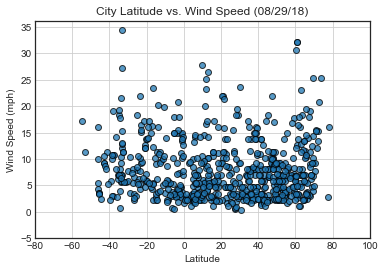

In [37]:
 # Build the scatter plot
plt.scatter(weather_df['Lat'], 
            weather_df['Wind Speed'],
            label="Cities",
            alpha=0.75,edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.xlim(-80,100)
plt.ylim(-5,)

plt.savefig("output_data/lat_vs_Wind.png", dpi=1000)

plt.show()

In [ ]:
#seaborn "style" didnt seem to be working...